In [1]:
import pandas as pd
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

import tools

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

imported tools


In [2]:
data_path = Path("/home/niclas/repos/uni/thesis/experiment/data")

procedures = ["1", "2", "3", "4", "5", "6", "overall"]


In [3]:
conditions = [x.stem for x in data_path.iterdir() if x.is_dir()]
conditions


['random', 'blocked', 'fixed']

In [4]:
data = {}
for condition in conditions:
    data[condition] = {}
    for vp in (data_path / condition).iterdir():
        data[condition][vp.stem] = tools.fix_vp(tools.unpickle(vp / "vp.pkl"), procedures)

data_train, data_test = tools.train_test_split(data)


In [5]:
condition = "blocked"
#print(data_train["fixed"])

In [6]:
train_blocked_fixed = tools.block_vps(data_train, "fixed")
train_blocked_random = tools.block_vps(data_train, "random")
train_blocked_blocked = tools.block_vps(data_train, "blocked")

test_blocked_fixed = tools.block_vps(data_test, "fixed")
test_blocked_random = tools.block_vps(data_test, "random")
test_blocked_blocked = tools.block_vps(data_test, "blocked")

In [7]:

#fig = tools.plot_vp(blocked_vps[list(blocked_vps.keys())[0]])
#plt.show()


In [8]:
#tools.plot_average_vps(test_blocked_fixed)
#plt.show()

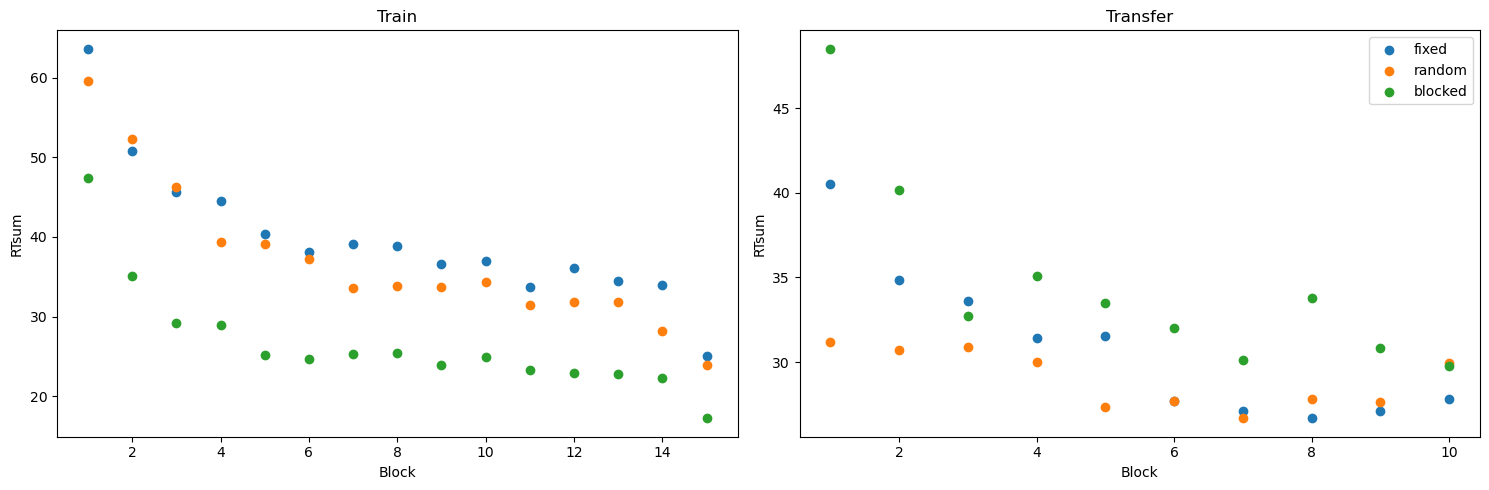

In [12]:
plt.rcParams["figure.figsize"] = [15,5]
fig, axes = plt.subplots(ncols=2, nrows=1)
tools.plot_average_vps(axes[0], "fixed", train_blocked_fixed)
tools.plot_average_vps(axes[0], "random", train_blocked_random)
tools.plot_average_vps(axes[0], "blocked", train_blocked_blocked)

tools.plot_average_vps(axes[1], "fixed", test_blocked_fixed)
tools.plot_average_vps(axes[1], "random", test_blocked_random)
tools.plot_average_vps(axes[1], "blocked", test_blocked_blocked)

axes[0].set_title("Train")
axes[0].set_xlabel("Block")
axes[0].set_ylabel("RTsum")
axes[1].set_title("Transfer")
#plt.xlabel("Block")
axes[1].set_xlabel("Block")
plt.ylabel("RTsum")
plt.legend()
fig.tight_layout()
plt.savefig("RT.png")
plt.show()

In [10]:
condition = "random"
df = pd.DataFrame([tools.total_accuracy(data[condition][vp], procedures) for vp in data[condition].keys()], index=data[condition].keys(), columns=["train", "test"])
df


train      test
vp14  0.982222  0.986667
vp18  0.962222  0.970000
vp15  0.973333  0.980000
vp20  0.906667  0.980000
vp10  0.924444  0.943333
vp13  0.857778  0.946667
vp17  0.911111  0.960000
vp12  0.822222  0.820000
vp19  0.966667  0.800000
vp16  0.957778  0.926667

In [11]:
condition = "random"
proc_accs = [
    tools.count_correct(data[condition][vp], data[condition][vp].keys(), procedures)
    for vp in data[condition].keys()
]
for vp in proc_accs:
    for proc in vp.keys():
        vp[proc] /= len(next(iter(data[condition].values())).keys())
df = pd.DataFrame(proc_accs, index=data[condition].keys())
df


1      2      3      4      5      6  overall
vp14  0.992  0.976  0.992  0.976  0.400  0.600    0.968
vp18  0.976  0.976  0.960  0.392  0.600  0.984    0.904
vp15  0.992  0.992  0.960  0.392  0.592  1.000    0.928
vp20  0.992  0.376  0.952  0.976  0.976  0.560    0.784
vp10  0.968  0.360  0.592  0.984  0.984  0.992    0.712
vp13  0.384  0.960  0.928  0.560  0.992  0.968    0.568
vp17  0.392  0.968  0.584  1.000  1.000  0.992    0.648
vp12  0.992  0.592  0.392  0.976  0.960  1.000    0.016
vp19  1.000  0.992  0.000  0.576  0.992  0.992    0.848
vp16  0.976  0.600  0.376  0.976  0.992  1.000    0.752